<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/Decision_Tree(BreastCancer_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer = load_breast_cancer()

In [ ]:
# 데이터 정보확인
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# 표준화 시키기
# 이유 : 모델의 학습성능을 높이기 위해서 해당 값들을 일정 범위의 값으로 스케일링 해준다.
# Standardization : 정규분포를 평균이 0, 분산이 1인 표준 정규 분포로 바꿔준다.
scale = StandardScaler()
scale.fit_transform(cancer['data'])

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
# Train 데이터 세트와 Test 데이터 세트를 구성한다
x_train, x_test, y_train, y_test = \
    train_test_split(cancer['data'], cancer['target'], test_size = 0.2)

In [ ]:
trainGini = []
testGini = []
trainEntropy = []
testEntropy = []

for k in range(5, 21):
  # Gini 계수를 사용하여 학습 데이터를 학습한다.
  dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
  dt.fit(x_train, y_train)

  # 정확도를 측정한다.
  trainGini.append(dt.score(x_train, y_train))
  testGini.append(dt.score(x_test, y_test))

  # Entropy를 사용하여 학습 데이터를 학습한다.
  dt = DecisionTreeClassifier(criterion='entropy', max_depth=k)
  dt.fit(x_train, y_train)
  trainEntropy.append(dt.score(x_train, y_train))
  testEntropy.append(dt.score(x_test, y_test))

In [ ]:
print(trainGini)
print()
print(testGini)
print()
print(trainEntropy)
print()
print(testEntropy)

[0.9912087912087912, 0.9978021978021978, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315]

[0.9934065934065934, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

[0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544]


In [ ]:
# 정확도 평가
acc = dt.score(x_test, y_test)
print('정확도 = ', np.round(acc, 4))

정확도 =  0.9649


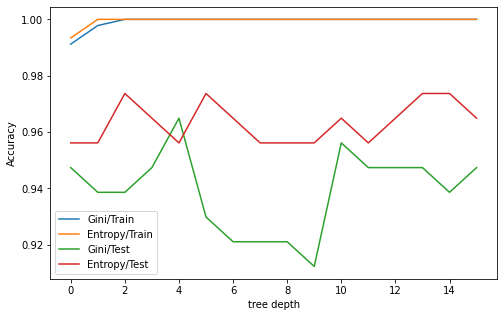

In [ ]:
# Gini와 Entropy, 그리고 tree depth에 따른 정확도를 비교한다.
plt.figure(figsize=(8,5))
plt.plot(trainGini, label = "Gini/Train")
plt.plot(trainEntropy, label = "Entropy/Train")
plt.plot(testGini, label = "Gini/Test")
plt.plot(testEntropy, label = "Entropy/Test")
plt.legend()
plt.xlabel("tree depth")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# feature별 중요도를 파악한다.
feat_impo = dt.feature_importances_
feat_name = list(cancer['feature_names'])

In [ ]:
np.argsort(feat_name)
# np.sort(feat_name)[::-1] # 내림차순

array([13, 15, 17, 16, 19,  3,  5,  7,  6,  9,  2,  0,  4,  8,  1, 12, 10,
       14, 18, 11, 23, 25, 27, 26, 29, 22, 20, 24, 28, 21])

In [ ]:
# 중요도가 높은 feture 5개를 확인한다.
idx = np.argsort(feat_impo)[::-1][:5] # 상위5개
cancer['feature_names'][idx]

array(['worst area', 'worst concave points', 'worst texture',
       'mean concavity', 'area error'], dtype='<U23')

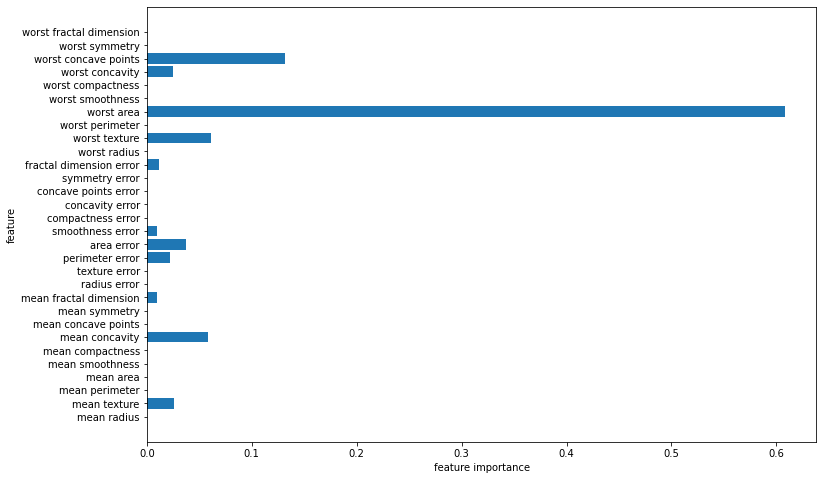

In [ ]:
# Feature들의 중요도를 분석하여 시각화 하기 
plt.figure(figsize=(12, 8))
x_idx = np.arange(len(feat_name))
plt.barh(x_idx, feat_impo, align = 'center')
plt.yticks(x_idx, feat_name)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()